# Preparations

In [1]:
# Do something with Pkg...
import Pkg
Pkg.DEFAULT_IO[] = stdout;

In [2]:
# Fetch packages.
using JSON
using Plots; mm = Plots.mm;

In [3]:
# Benchamrking parameters
lengs = 10 .^(range(1,stop=3,length=3));

In [4]:
# Declares the methods.
methods_ode = [("catalyst_lsoda","Catalyst (LSODA)",:lightskyblue,:solid,:star4),("catalyst_CVODE_BDF","Catalyst (CVODE)",:royalblue,:solid,:circle),("catalyst_TRBDF2","Catalyst (TRBDF2)",:lightslateblue,:solid,:diamond),("catalyst_KenCarp4","Catalyst (KenCarp4)",:turquoise2,:solid,:rect),("catalyst_QNDF","Catalyst (QNDF)",:navyblue,:solid,:dtriangle),("catalyst_FBDF","Catalyst (FBDF)",:darkmagenta,:solid,:star5),("catalyst_Rosenbrock23","Catalyst (Rosenbrock23)",:purple4,:solid,:heptagon),("bionetgen_ode","Bionetgen (CVODE)",:lime,:solid,:pentagon),("copasi_deterministic","Copasi (LSODA)",:orange,:solid,:star8),("gillespy2_lsoda","Gillespy2 (LSODA)",:magenta,:solid,:star6),("matlab_ode","MATLAB SimBiology (CVODE)",:red,:solid,:utriangle)]
methods_ssa = [("catalyst_Direct","Catalyst (Direct)",:lightskyblue1,:solid,:star4),("catalyst_SortingDirect","Catalyst (SortingDirect)",:indigo,:solid,:circle),("catalyst_RSSA","Catalyst (RSSA)",:lightslateblue,:solid,:diamond),("catalyst_RSSACR","Catalyst (RSSACR)",:royalblue4,:solid,:rect),("bionetgen_ssa","Bionetgen (SortingDirect)",:lime,:dash,:pentagon),("copasi_directMethod","Copasi (Direct)",:orange,:solid,:star8),("gillespy2_ssa","Gillespy2 (Direct)",:magenta,:solid,:star6),("matlab_ssa","MATLAB SimBiology (Direct)",:red,:solid,:utriangle)];

In [5]:
# Function for plotting a specific benchamrk.
function plot_benchmarks(model,methods;lw=6,legendfontsize=11,legend=:bottomright,ymin=0.1,kwargs...)
    plot(); 
    xmin = 10.0; xmax = 0.0; ymax = 0.0;
    for (i,method) in enumerate(methods)
        !isfile("Benchmarking_results/$(method[1])_$(model).json") && continue
        br = JSON.parsefile("Benchmarking_results/$(method[1])_$(model).json")
        plot!(br["lengs"],br["medians"],lw=lw,la=0.8,label="",xaxis=:log,yaxis=:log,xguide="Simulation length",yguide="Simulation time (ms)",color=method[3],linestyle=method[4])
        plot!(br["lengs"],br["medians"],seriestype=:scatter,markersize=6,markershape=method[5],markeralpha=0.6,label=method[2],color=method[3])
        xmin = min(xmin,br["lengs"]...); xmax = max(xmax,br["lengs"]...); ymax = max(ymax,br["medians"]...); 
    end
    plot!(;legend=legend, legendfontsize=legendfontsize, xlimit=(xmin,xmax), ylimit=(ymin,1.2*ymax),kwargs...)    
end;

In [6]:
# Function for plotting a specific benchamrk.
function plot_benchmarks_jac(model,methods;lw=6,legendfontsize=11,legend=:bottomright,ymin=0.1,kwargs...)
    plot(); 
    xmin = 10.0; xmax = 0.0; ymax = 0.0;
    for (i,method) in enumerate(methods)
        !isfile("Benchmarking_results/$(method[1])_$(model).json") && continue
        br = JSON.parsefile("Benchmarking_results/$(method[1])_$(model).json")
        br_jac = JSON.parsefile("Benchmarking_results/$(method[1])_jac_sparse_$(model).json")
        plot!(br["lengs"],br["medians"],lw=lw,la=0.8,label="",xaxis=:log,yaxis=:log,xguide="Simulation length",yguide="Simulation time (ms)",color=method[3],linestyle=:solid)
        plot!(br["lengs"],br["medians"],seriestype=:scatter,markersize=6,markershape=method[5],markeralpha=0.6,label=method[2][findfirst('(',method[2])+1:findfirst(')',method[2])-1],color=method[3])
        plot!(br_jac["lengs"],br_jac["medians"],lw=lw,la=0.8,label="",xaxis=:log,yaxis=:log,xguide="Simulation length",yguide="Simulation time (ms)",color=method[3],linestyle=:dot)
        plot!(br_jac["lengs"],br_jac["medians"],seriestype=:scatter,markersize=6,markershape=method[5],markeralpha=0.6,label="",color=method[3])
        
        !isfile("Benchmarking_results/$(method[1])_sparse_$(model).json") && continue
        br_sparse = JSON.parsefile("Benchmarking_results/$(method[1])_sparse_$(model).json")
        plot!(br_sparse["lengs"],br_sparse["medians"],lw=lw,la=0.8,label="",xaxis=:log,yaxis=:log,xguide="Simulation length",yguide="Simulation time (ms)",color=method[3],linestyle=:dash)
        plot!(br_sparse["lengs"],br_sparse["medians"],seriestype=:scatter,markersize=6,markershape=method[5],markeralpha=0.6,label="",color=method[3])
        
        xmin = min(xmin,br["lengs"]...,br_jac["lengs"]...); xmax = max(xmax,br["lengs"]...,br_jac["lengs"]...); ymax = max(ymax,br["medians"]...,br_jac["medians"]...); 
    end
    plot!(;legend=legend, legendfontsize=legendfontsize, xlimit=(xmin,xmax), ylimit=(ymin,1.2*ymax),kwargs...)    
end;

In [7]:
# Function for plotting a specific benchamrk.
function plot_ode_benchmarks(model,methods_idxs,jacs;lw=6,legendfontsize=11,legend=:bottomright,ymin=0.1,kwargs...)
    plot(); 
    xmin = 10.0; xmax = 0.0; ymax = 0.0;
    for (i,method) in enumerate(methods_ode[end-3:end])
        !isfile("Benchmarking_results/$(method[1])_$(model).json") && continue
        br = JSON.parsefile("Benchmarking_results/$(method[1])_$(model).json")
        plot!(br["lengs"],br["medians"],lw=lw,la=0.8,label="",xaxis=:log,yaxis=:log,xguide="Simulation length",yguide="Simulation time (ms)",color=method[3],linestyle=method[4])
        plot!(br["lengs"],br["medians"],seriestype=:scatter,markersize=6,markershape=method[5],markeralpha=0.6,label=method[2],color=method[3])
        xmin = min(xmin,br["lengs"]...); xmax = max(xmax,br["lengs"]...); ymax = max(ymax,br["medians"]...); 
    end
    for (i,idx) in enumerate(methods_idxs)
        method = methods_ode[idx]
        if jacs[i]=="jac"
            br = JSON.parsefile("Benchmarking_results/$(method[1])_jac_sparse_$(model).json")
        elseif jacs[i]=="sparse"
            br = JSON.parsefile("Benchmarking_results/$(method[1])_sparse_$(model).json")
        else
            br = JSON.parsefile("Benchmarking_results/$(method[1])_$(model).json")
        end
        plot!(br["lengs"],br["medians"],lw=lw,la=0.8,label="",xaxis=:log,yaxis=:log,xguide="Simulation length",yguide="Simulation time (ms)",color=method[3],linestyle=method[4])
        plot!(br["lengs"],br["medians"],seriestype=:scatter,markersize=6,markershape=method[5],markeralpha=0.6,label=method[2],color=method[3])
        xmin = min(xmin,br["lengs"]...); xmax = max(xmax,br["lengs"]...); ymax = max(ymax,br["medians"]...); 
    end
    plot!(;legend=legend, legendfontsize=legendfontsize, xlimit=(xmin,xmax), ylimit=(ymin,1.2*ymax),kwargs...)    
end;

In [8]:
# Sets plotting defaults
default(framestyle=:box,grid=false,lw=4,la=0.9,guidefontsize=13,legend=:topleft)

# Analysis

In [10]:
ylimitODE = (1e0,1e6);
ylimitSSA = (1e1,1e8)
yTicks = [1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9];

### Multistate

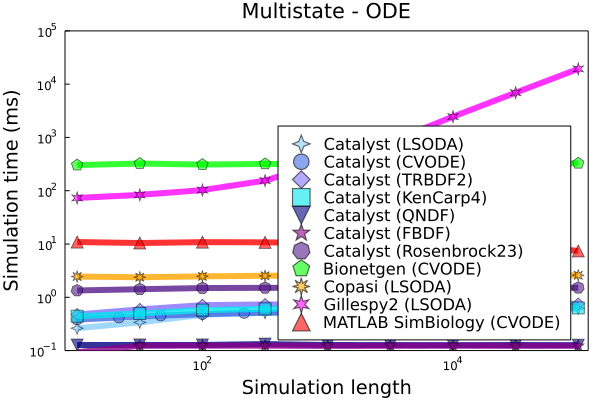

In [15]:
# Simulations time for ODE simulations.
multistate_ode_benchmark_plot = plot_benchmarks("multistate",methods_ode;title="Multistate - ODE", yticks=yTicks,ylimit=(1e-1,1e5),xlimit=(8,120000))

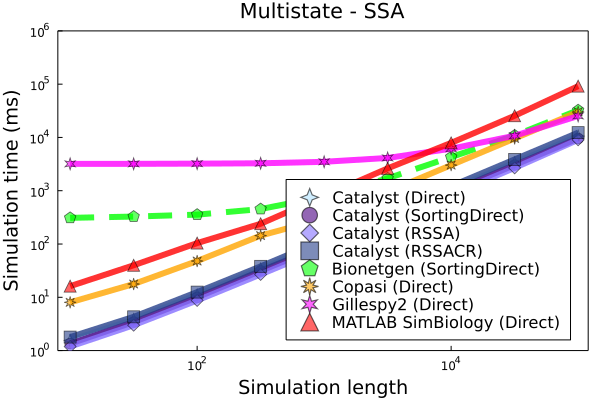

In [16]:
# Simulations time for Gillespie simulations.
multistate_gillespie_benchmark_plot = plot_benchmarks("multistate",methods_ssa;title="Multistate - SSA", yticks=yTicks,ylimit=(1e0,1e6),xlimit=(8,120000))

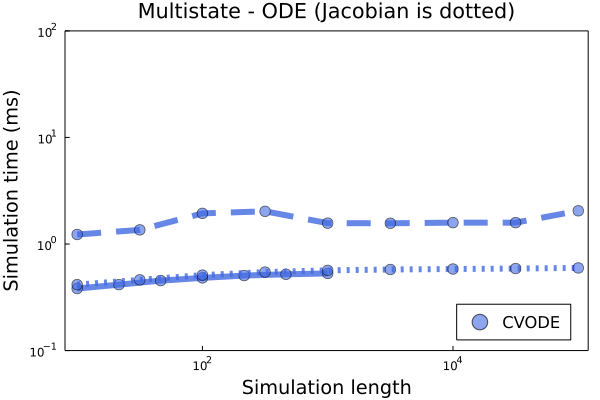

In [17]:
multistate_jac_benchmark_plot = plot_benchmarks_jac("multistate",methods_ode[2:2];title="Multistate - ODE (Jacobian is dotted)", yticks=yTicks,ylimit=(1e-1,1e2),xlimit=(8,120000))

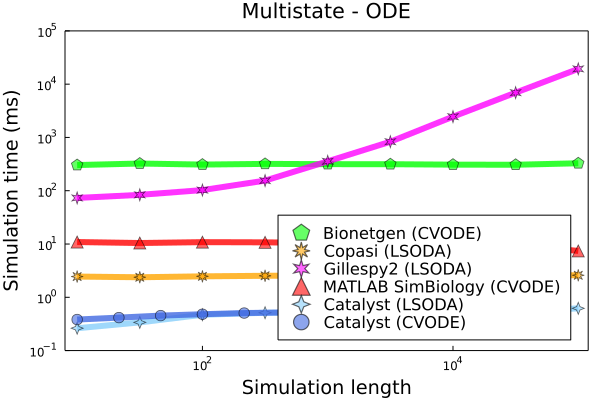

In [18]:
# Simulations time for ODE simulations.
multistate_ode_benchmark_selected_plot = plot_ode_benchmarks("multistate",[1,2],["",""];title="Multistate - ODE", yticks=yTicks,ylimit=(1e-1,1e5),xlimit=(8,120000))

### Multisite2

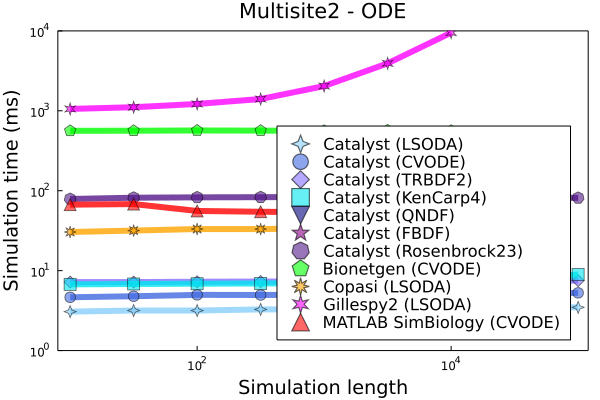

In [19]:
# Simulations time for ODE simulations.
multisite2_ode_benchmark_plot = plot_benchmarks("multisite2",methods_ode;title="Multisite2 - ODE", yticks=yTicks,ymin=1e-2,ylimit=(1e0,1e4),xlimit=(8,120000))

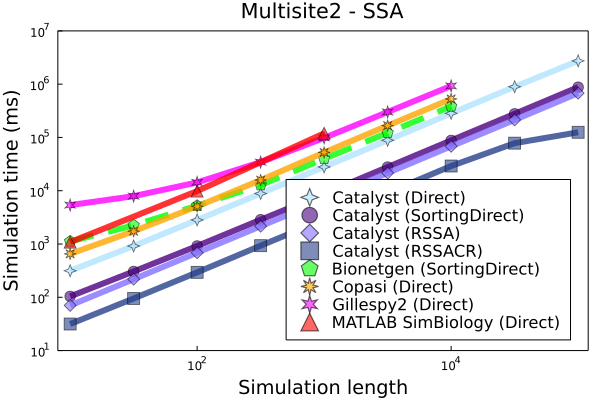

In [20]:
# Simulations time for Gillespie simulations.
multisite2_gillespie_benchmark_plot = plot_benchmarks("multisite2",methods_ssa;title="Multisite2 - SSA", yticks=yTicks,ylimit=(1e1,1e7),xlimit=(8,120000))

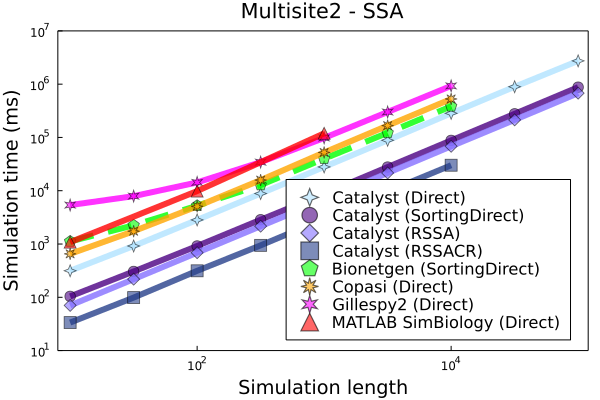

In [48]:
# Simulations time for Gillespie simulations.
multisite2_gillespie_benchmark_plot = plot_benchmarks("multisite2",methods_ssa;title="Multisite2 - SSA", yticks=yTicks,ylimit=(1e1,1e7),xlimit=(8,120000))

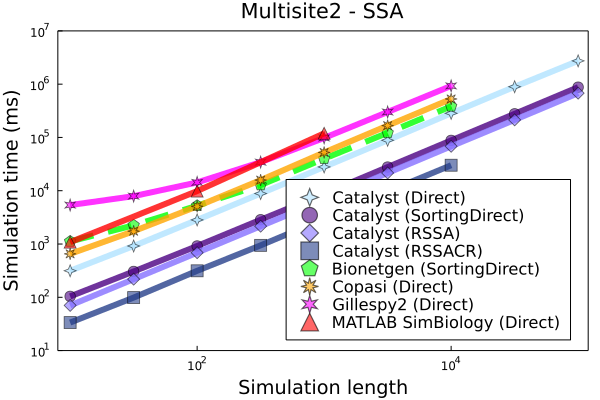

In [46]:
# Simulations time for Gillespie simulations.
multisite2_gillespie_benchmark_plot = plot_benchmarks("multisite2",methods_ssa;title="Multisite2 - SSA", yticks=yTicks,ylimit=(1e1,1e7),xlimit=(8,120000))

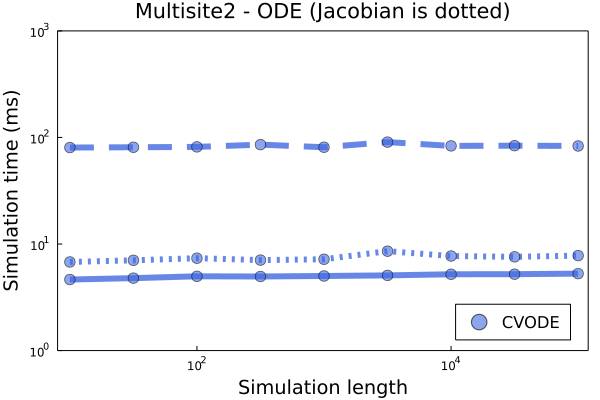

In [22]:
multisite2_jac_benchmark_plot = plot_benchmarks_jac("multisite2",methods_ode[2:2];title="Multisite2 - ODE (Jacobian is dotted)", yticks=yTicks,ymin=1e0,ylimit=(1e0,1e3),xlimit=(8,120000))

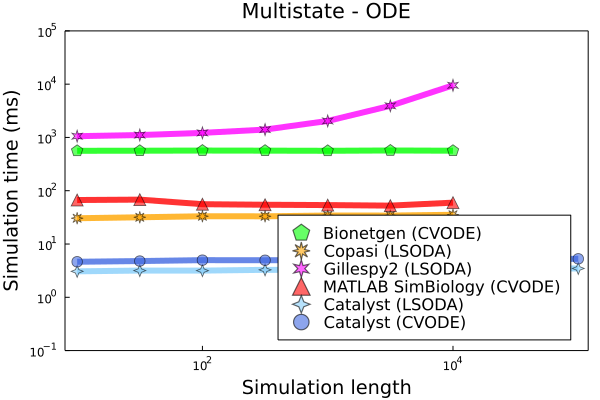

In [23]:
# Simulations time for ODE simulations.
multisite2_ode_benchmark_selected_plot = plot_ode_benchmarks("multisite2",[1,2],["",""];title="Multistate - ODE", yticks=yTicks,ylimit=(1e-1,1e5),xlimit=(8,120000))

### Egfr_net

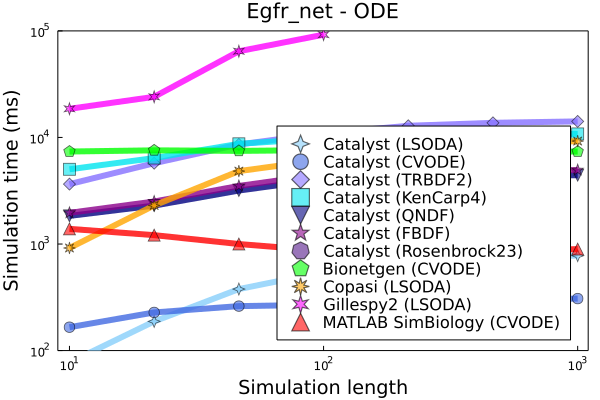

In [24]:
# Simulations time for ODE simulations.
egfr_net_ode_benchmark_plot = plot_benchmarks("egfr_net",methods_ode; title="Egfr_net - ODE", yticks=yTicks,ylimit=(1e2,1e5),xlimit=(9,1100))

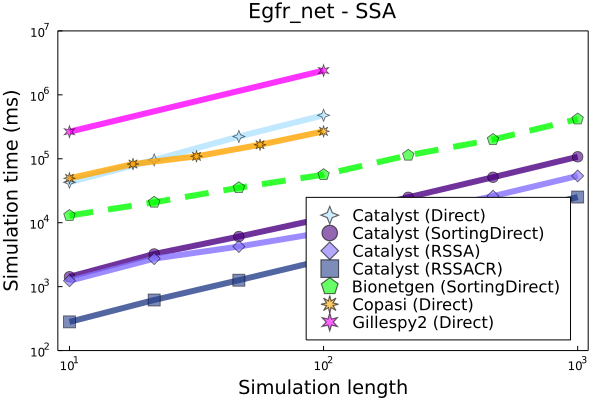

In [25]:
# Simulations time for Gillespie simulations.
egfr_net_gillespie_benchmark_plot = plot_benchmarks("egfr_net",methods_ssa; title="Egfr_net - SSA", yticks=yTicks,ylimit=(1e2,1e7),xlimit=(9,1100))

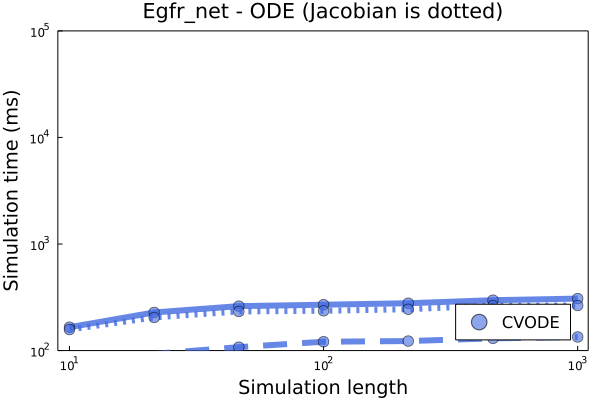

In [26]:
egfr_net_jac_benchmark_plot = plot_benchmarks_jac("egfr_net",methods_ode[2:2];title="Egfr_net - ODE (Jacobian is dotted)", yticks=yTicks,ylimit=(1e2,1e5),xlimit=(9,1100))

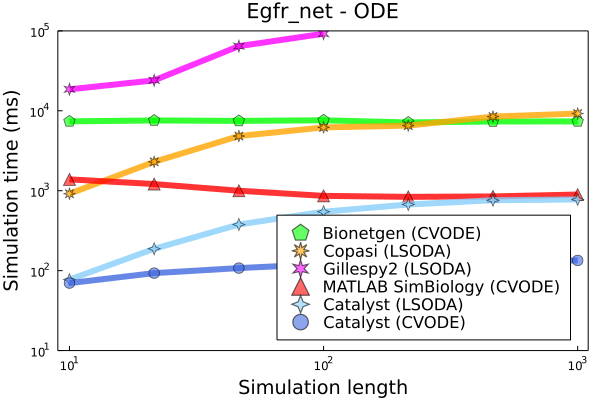

In [27]:
# Simulations time for ODE simulations.
egfr_net_ode_benchmark_selected_plot = plot_ode_benchmarks("egfr_net",[1,2],["","sparse"];title="Egfr_net - ODE", yticks=yTicks,ylimit=(1e1,1e5),xlimit=(9,1100))

### BCR

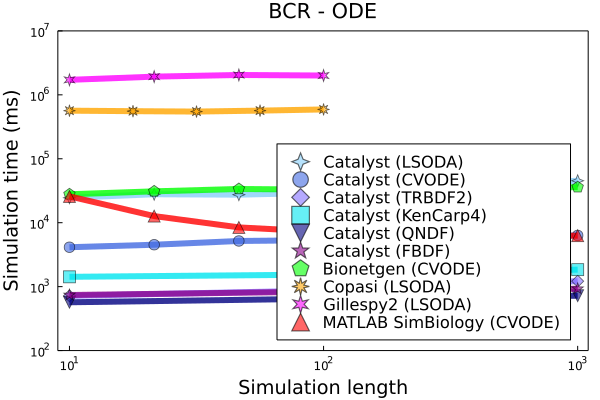

In [28]:
# Simulations time for ODE simulations.
BCR_ode_benchmark_plot = plot_benchmarks("BCR",methods_ode; title="BCR - ODE", yticks=yTicks,ylimit=(1e2,1e7),xlimit=(9,1100))

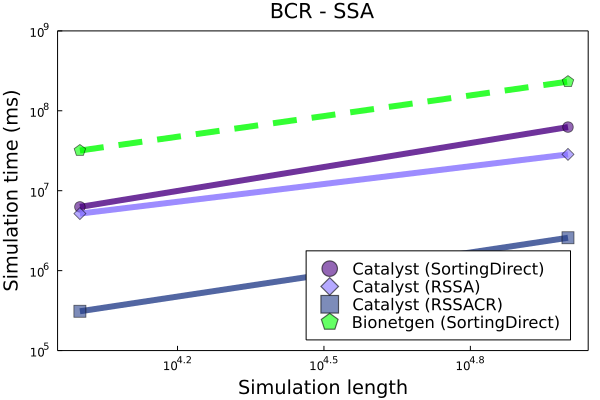

In [29]:
# Simulations time for Gillespie simulations.
BCR_gillespie_benchmark_plot = plot_benchmarks("BCR",methods_ssa; title="BCR - SSA", yticks=yTicks,ylimit=(1e5,1e9),xlimit=(9000,110000))

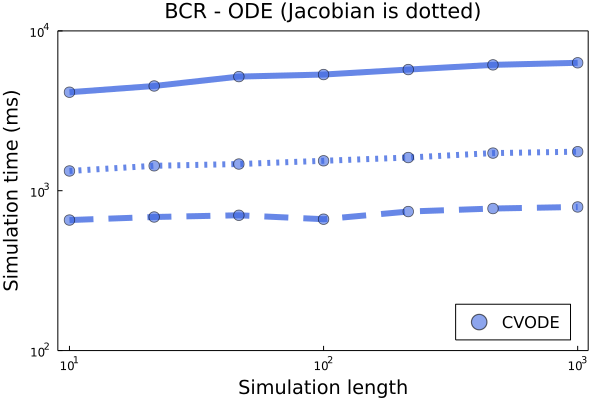

In [30]:
BCR_jac_benchmark_plot = plot_benchmarks_jac("BCR",methods_ode[2:2];title="BCR - ODE (Jacobian is dotted)", yticks=yTicks,ylimit=(1e2,1e4),xlimit=(9,1100))

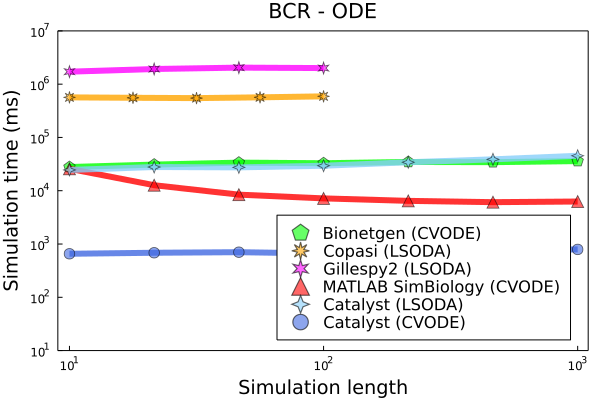

In [31]:
# Simulations time for ODE simulations.
BCR_ode_benchmark_selected_plot = plot_ode_benchmarks("BCR",[1,2],["","sparse"];title="BCR - ODE", yticks=yTicks,ylimit=(1e1,1e7),xlimit=(9,1100))

### Fceri_gamma2

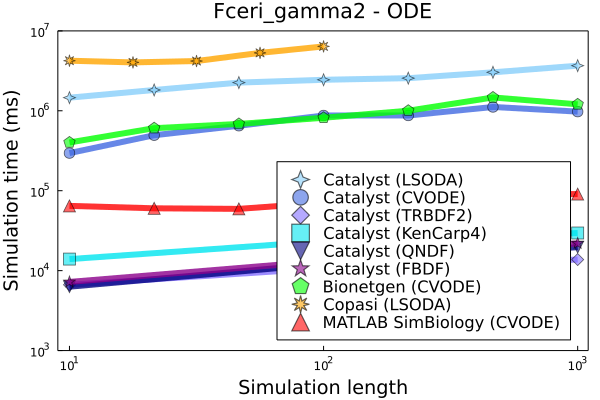

In [32]:
# Simulations time for ODE simulations.
fceri_gamma2_ode_benchmark_plot = plot_benchmarks("fceri_gamma2",methods_ode; title="Fceri_gamma2 - ODE", yticks=yTicks,ylimit=(1e3,1e7),xlimit=(9,1100))

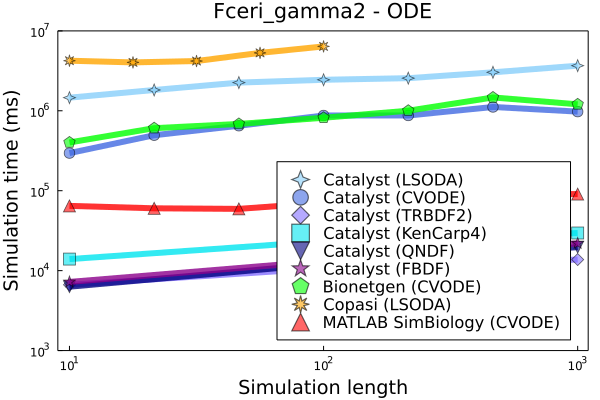

In [33]:
# Simulations time for ODE simulations.
fceri_gamma2_ode_benchmark_plot = plot_benchmarks("fceri_gamma2",methods_ode; title="Fceri_gamma2 - ODE", yticks=yTicks,ylimit=(1e3,1e7),xlimit=(9,1100))

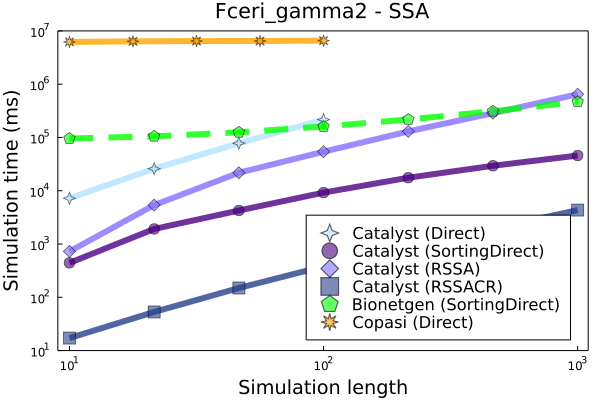

In [34]:
# Simulations time for Gillespie simulations.
fceri_gamma2_gillespie_benchmark_plot = plot_benchmarks("fceri_gamma2",methods_ssa; title="Fceri_gamma2 - SSA", yticks=yTicks,ylimit=(1e1,1e7),xlimit=(9,1100))

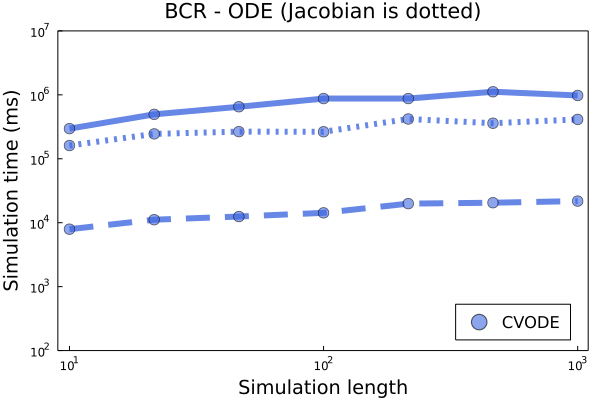

In [42]:
fceri_gamma2_jac_benchmark_plot = plot_benchmarks_jac("fceri_gamma2",methods_ode[2:2];title="BCR - ODE (Jacobian is dotted)", yticks=yTicks,ylimit=(1e2,1e7),xlimit=(9,1100))

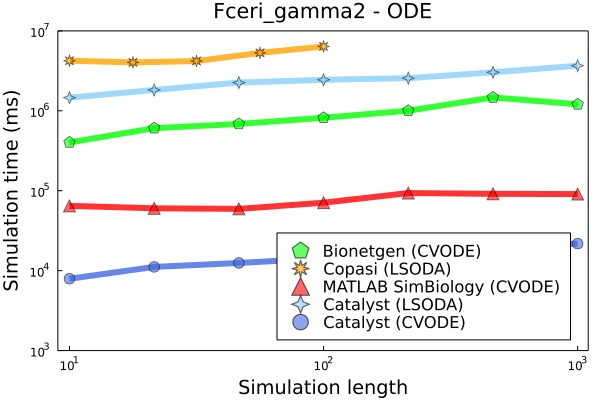

In [36]:
# Simulations time for ODE simulations.
fceri_gamma2_ode_benchmark_selected_plot = plot_ode_benchmarks("fceri_gamma2",[1,2],["","sparse"];title="Fceri_gamma2 - ODE", yticks=yTicks,ylimit=(1e3,1e7),xlimit=(9,1100))

### Combined Plot

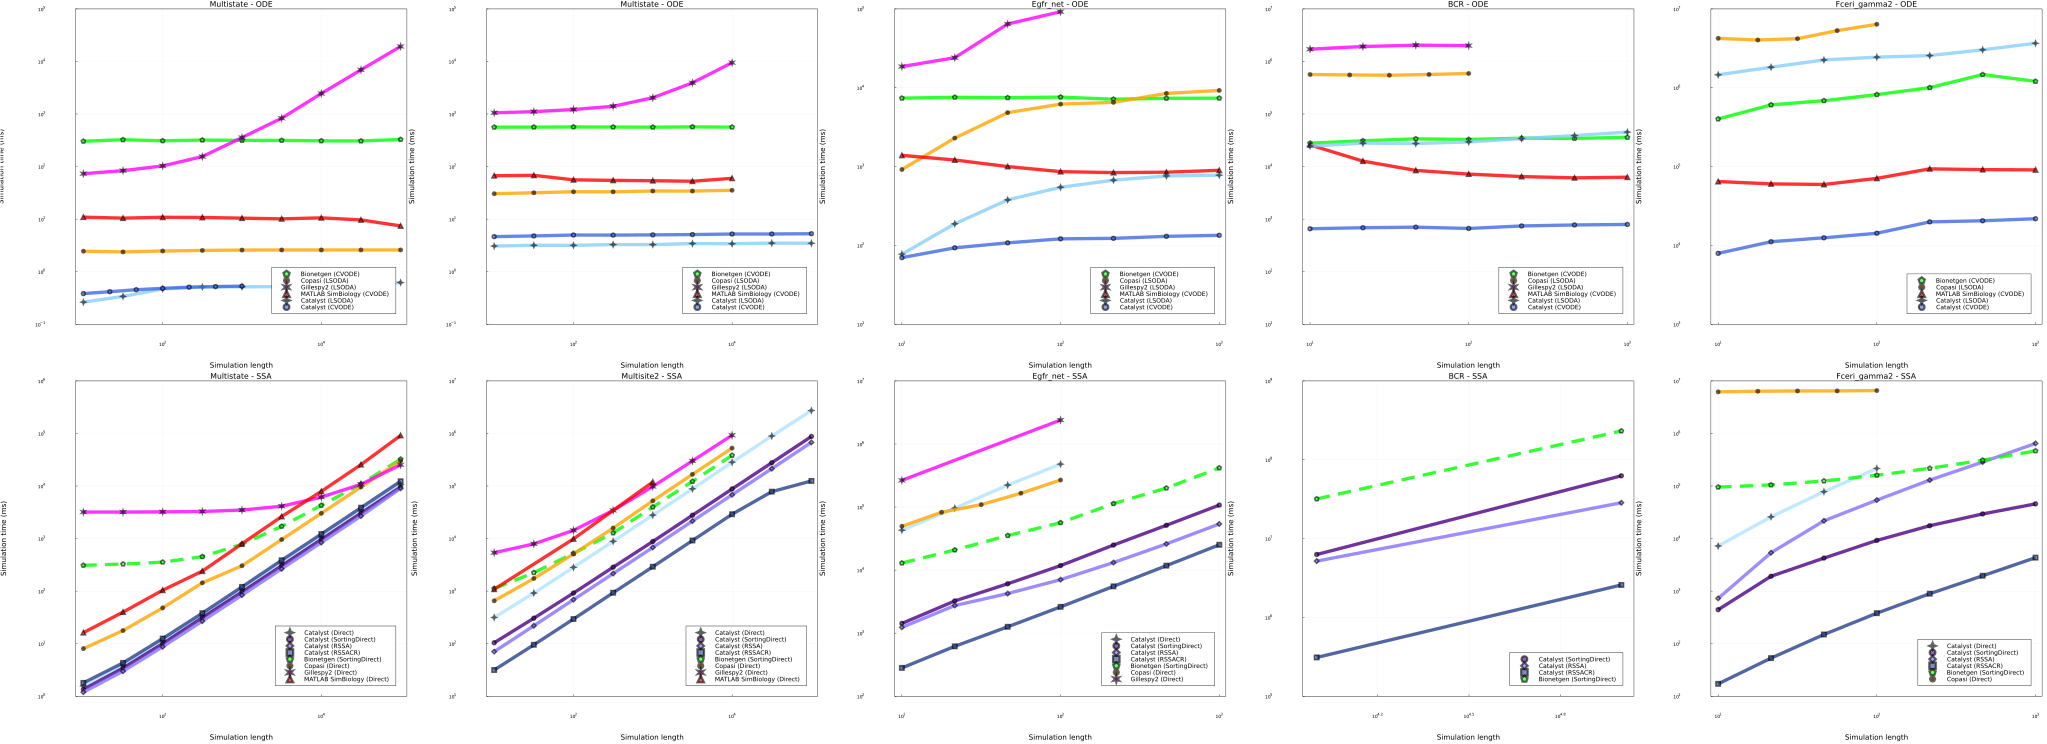

In [37]:
combined_benchmarks_plot = plot(multistate_ode_benchmark_selected_plot,multisite2_ode_benchmark_selected_plot,egfr_net_ode_benchmark_selected_plot,BCR_ode_benchmark_selected_plot,fceri_gamma2_ode_benchmark_selected_plot,multistate_gillespie_benchmark_plot,multisite2_gillespie_benchmark_plot,egfr_net_gillespie_benchmark_plot,BCR_gillespie_benchmark_plot,fceri_gamma2_gillespie_benchmark_plot,
     layout=(2,5),size=(5500,2000),left_margin=25mm,bottom_margin=20mm,lw=9,grid=true)

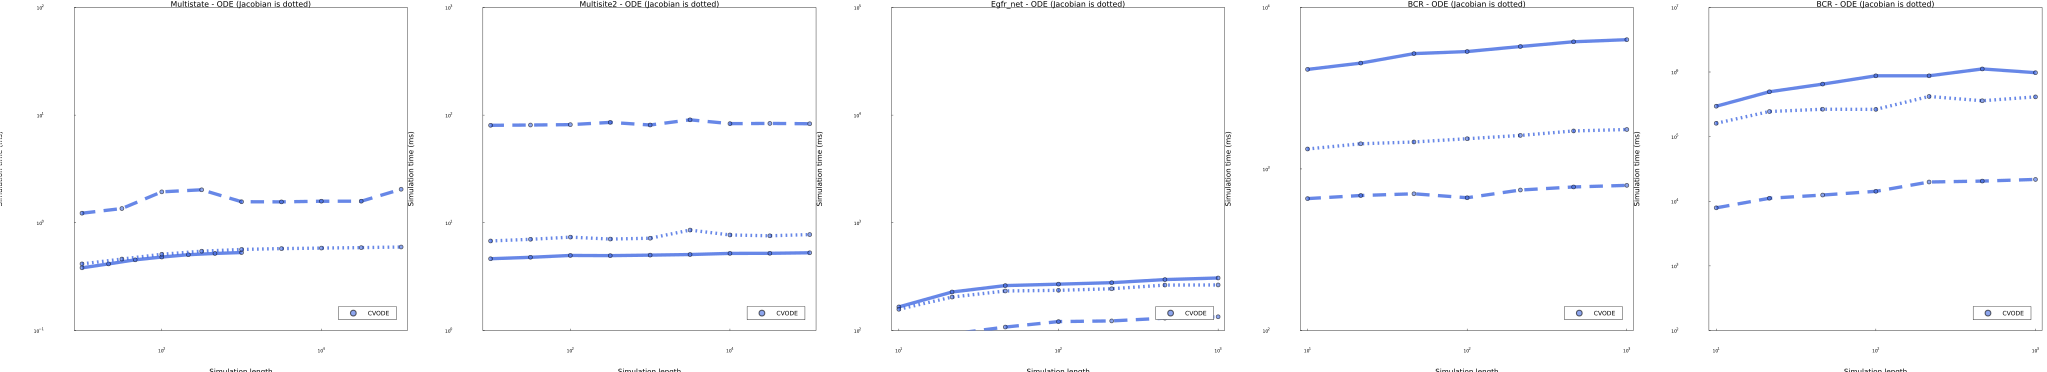

In [43]:
combined_jac_benchmarks_plot = plot(multistate_jac_benchmark_plot,multisite2_jac_benchmark_plot,egfr_net_jac_benchmark_plot,BCR_jac_benchmark_plot,fceri_gamma2_jac_benchmark_plot,
     layout=(1,5),size=(5500,1000),left_margin=25mm,bottom_margin=20mm,lw=9)

In [44]:
savefig(combined_benchmarks_plot,"Plots/benchmarks_results_plot.png")
savefig(plot!(combined_benchmarks_plot,legend=:none),"Plots/benchmarks_results_plot.svg")

In [45]:
savefig(combined_jac_benchmarks_plot,"Plots/jac_benchmarks_plot.png")

### Compares to Gupta benchmarks

In [27]:
using CSV, DataFrames, Statistics

In [28]:
methods_gupta = [(" BioNetGen","Bionetgen (Gupta)",:darkgreen,:dash,:octagon),(" COPASI_D","Copasi_D (Gupta)",:yellow,:solid,:star8),(" COPASI_GB","Copasi_GB (Gupta)",:red,:solid,:star4),(" Gillespie2","Gillespy2 (Gupta)",:purple4,:solid,:utriangle)];

In [29]:
plot_gupta_benchmarks(args...;kwargs...) = (plot(); plot_gupta_benchmarks!(args...;kwargs...);)
function plot_gupta_benchmarks!(model,methods;lw=6,legendfontsize=11,legend=:bottomright,ymin=0.1,kwargs...)
    df = CSV.read("Benchmarking_results/Gupta_benchmarks/$(model)_results_time.csv",DataFrame)
    for method in methods
        values = 1000.0*parse.(Float64,string.(filter(s -> s!=" ", df[:,method[1]])))
        times = unique(df[:,"Endtime"][1:length(values)])
        value_dict = Dict(map(time -> time => [], times))
        for i = 1:length(values)           
            push!(value_dict[df[:,"Endtime"][i]],values[i])
        end     
        #foreach(val -> println(value_dict[val]), times)
        runtimes = map(time -> median(value_dict[time]), times)
        plot!(times,runtimes,lw=lw,la=0.8,label="",xaxis=:log,yaxis=:log,xguide="Simulation length",yguide="Simulation time (ms)",color=method[3],linestyle=method[4])
        plot!(times,runtimes,seriestype=:scatter,markersize=6,markershape=method[5],markeralpha=0.6,label=method[2],color=method[3])
    end
    plot!(;legend=legend, legendfontsize=legendfontsize, kwargs...)    
end;

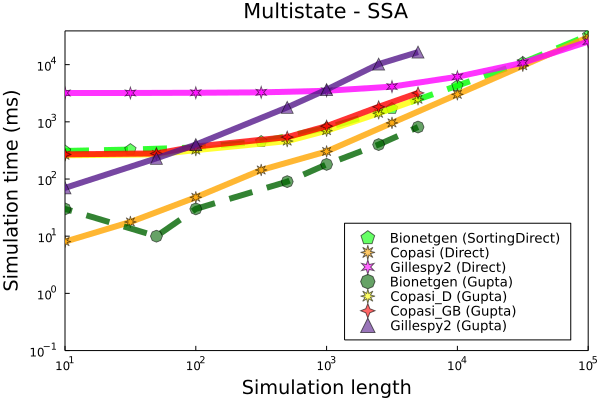

In [30]:
plot_benchmarks("Multistate",methods_ssa[5:7];title="Multistate - SSA", yticks=[1e-1,1e0,1e1,1e2,1e3,1e4,1e5,1e6])
multistate_benchmark_gupta_comparison_plot = plot_gupta_benchmarks!("Multistate",methods_gupta,legendfontsize=9)

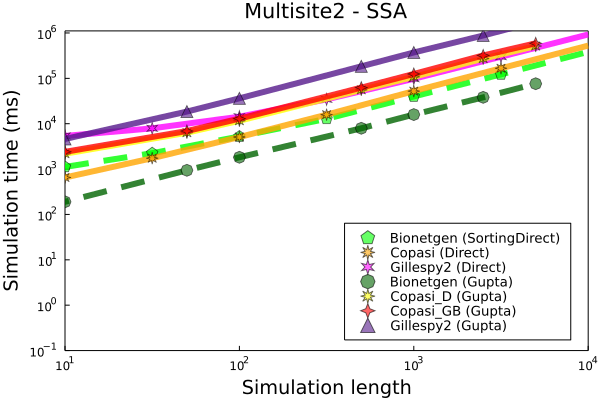

In [31]:
plot_benchmarks("multisite2",methods_ssa[5:7];title="Multisite2 - SSA", yticks=[1e-1,1e0,1e1,1e2,1e3,1e4,1e5,1e6])
multisite2_benchmark_gupta_comparison_plot = plot_gupta_benchmarks!("Multisite",methods_gupta,legendfontsize=9)

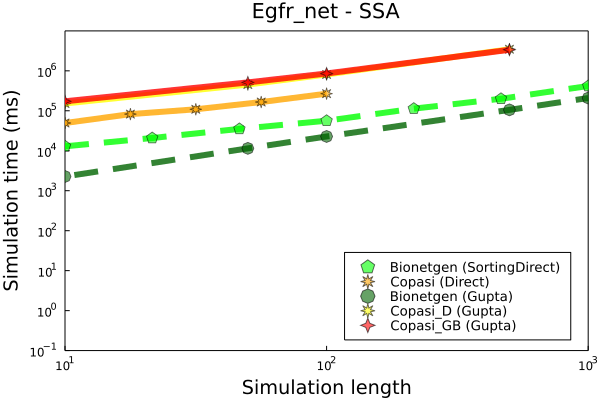

In [32]:
plot_benchmarks("egfr_net",methods_ssa[5:6];title="Egfr_net - SSA", yticks=[1e-1,1e0,1e1,1e2,1e3,1e4,1e5,1e6])
egfr_net_benchmark_gupta_comparison_plot = plot_gupta_benchmarks!("EGFR",methods_gupta[1:3],legendfontsize=9); plot!(ylimit=(1e-1,1e7))

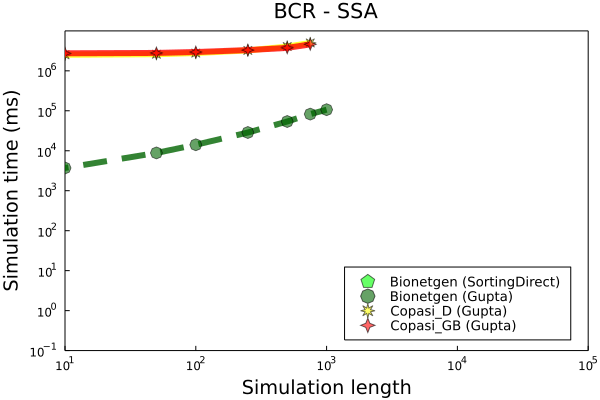

In [33]:
plot_benchmarks("BCR",methods_ssa[5:6];title="BCR - SSA", yticks=[1e-1,1e0,1e1,1e2,1e3,1e4,1e5,1e6])
BCR_benchmark_gupta_comparison_plot = plot_gupta_benchmarks!("BCR",methods_gupta[1:3],legendfontsize=9); plot!(ylimit=(1e-1,1e7))

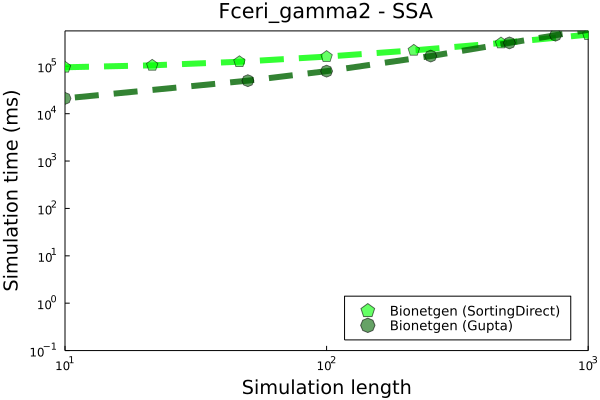

In [34]:
plot_benchmarks("fceri_gamma2",methods_ssa[5:5];title="Fceri_gamma2 - SSA", yticks=[1e-1,1e0,1e1,1e2,1e3,1e4,1e5,1e6])
fceri_gamma2_benchmark_gupta_comparison_plot = plot_gupta_benchmarks!("Fceri",methods_gupta[1:1],legendfontsize=9)

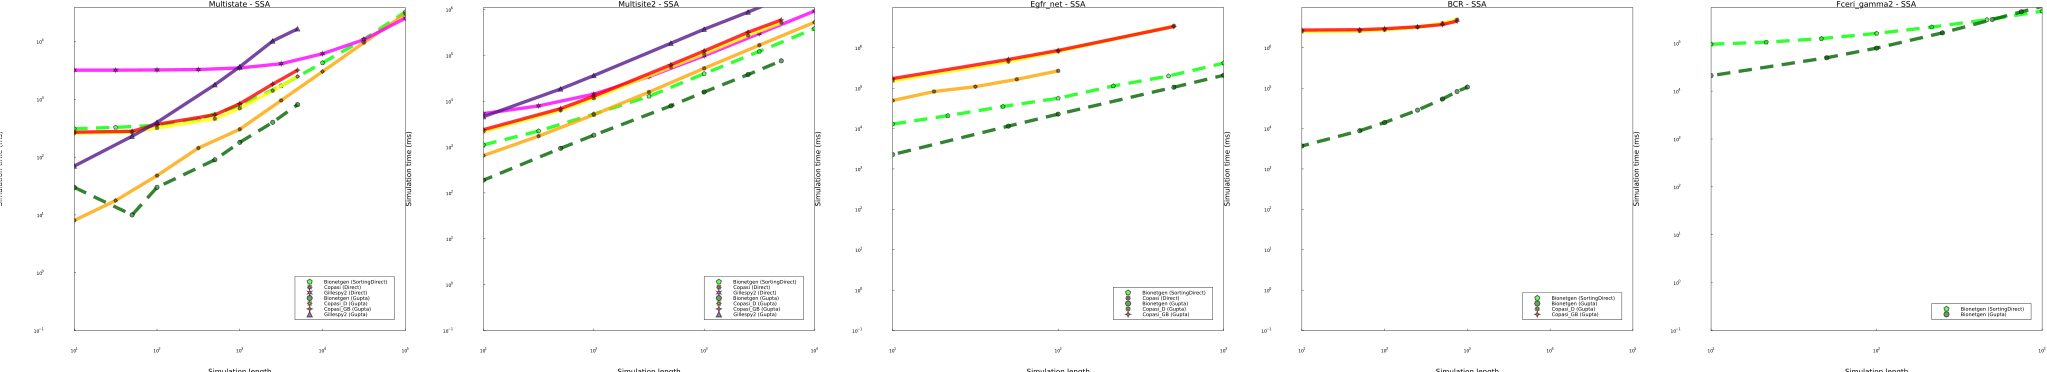

In [35]:
benchmark_gupta_comparison_plots = plot(multistate_benchmark_gupta_comparison_plot,multisite2_benchmark_gupta_comparison_plot,egfr_net_benchmark_gupta_comparison_plot,BCR_benchmark_gupta_comparison_plot,fceri_gamma2_benchmark_gupta_comparison_plot,layout=(1,5),size=(5500,1000),left_margin=25mm,bottom_margin=20mm,lw=9)

In [36]:
savefig(benchmark_gupta_comparison_plots,"Plots/benchmark_gupta_comparison_plot.png")